In [2]:
import numpy as np
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 

In [3]:
match=pd.read_csv(r"C:\Users\SOUMYAJIT\Downloads\matches.csv")
delivery=pd.read_csv(r"C:\Users\SOUMYAJIT\Downloads\deliveries.csv.zip")

In [4]:
match.head()

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [5]:
match.shape

(756, 18)

In [6]:
match.isna().sum()

id                   0
Season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               4
win_by_runs          0
win_by_wickets       0
player_of_match      4
venue                0
umpire1              2
umpire2              2
umpire3            637
dtype: int64

C:\Users\SOUMYAJIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

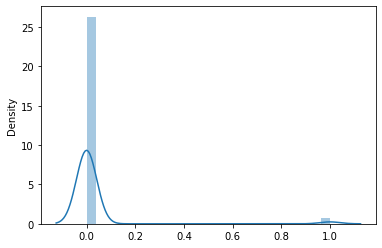

In [7]:
sns.distplot(match[["dl_applied"]])

(array([737.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  19.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

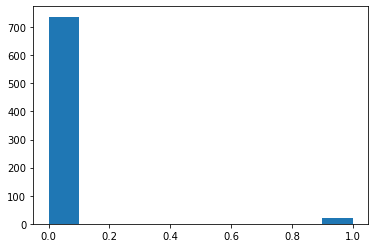

In [8]:
plt.hist(match[["dl_applied"]])

In [9]:
delivery.head()

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


In [10]:
delivery.shape

(179078, 21)

In [11]:
total_score_df=delivery.groupby(['match_id','inning']).sum()['total_runs'].reset_index()
total_score_df

,match_id,inning,total_runs
0,1,1,207
1,1,2,172
2,2,1,184
3,2,2,187
4,3,1,183
...,...,...,...
1523,11413,2,170
1524,11414,1,155
1525,11414,2,162
1526,11415,1,152


In [12]:
total_score_df=total_score_df[total_score_df['inning']==1]
total_score_df

,match_id,inning,total_runs
0,1,1,207
2,2,1,184
4,3,1,183
6,4,1,163
8,5,1,157
...,...,...,...
1518,11347,1,143
1520,11412,1,136
1522,11413,1,171
1524,11414,1,155


In [13]:
match_df=match.merge(total_score_df[['match_id','total_runs']],left_on='id',right_on='match_id')
match_df

,id,Season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3,match_id,total_runs
0,1,IPL-2017,Hyderabad,05-04-2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN,1,207
1,2,IPL-2017,Pune,06-04-2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN,2,184
2,3,IPL-2017,Rajkot,07-04-2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN,3,183
3,4,IPL-2017,Indore,08-04-2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN,4,163
4,5,IPL-2017,Bangalore,08-04-2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN,5,157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
751,11347,IPL-2019,Mumbai,05-05-2019,Kolkata Knight Riders,Mumbai Indians,Mumbai Indians,field,normal,0,Mumbai Indians,0,9,HH Pandya,Wankhede Stadium,Nanda Kishore,O Nandan,S Ravi,11347,143
752,11412,IPL-2019,Chennai,07-05-2019,Chennai Super Kings,Mumbai Indians,Chennai Super Kings,bat,normal,0,Mumbai Indians,0,6,AS Yadav,M. A. Chidambaram Stadium,Nigel Llong,Nitin Menon,Ian Gould,11412,136
753,11413,IPL-2019,Visakhapatnam,08-05-2019,Sunrisers Hyderabad,Delhi Capitals,Delhi Capitals,field,normal,0,Delhi Capitals,0,2,RR Pant,ACA-VDCA Stadium,NaN,NaN,NaN,11413,171
754,11414,IPL-2019,Visakhapatnam,10-05-2019,Delhi Capitals,Chennai Super Kings,Chennai Super Kings,field,normal,0,Chennai Super Kings,0,6,F du Plessis,ACA-VDCA Stadium,Sundaram Ravi,Bruce Oxenford,Chettithody Shamshuddin,11414,155


In [14]:
match_df['team1'].unique()

array(['Sunrisers Hyderabad', 'Mumbai Indians', 'Gujarat Lions',
       'Rising Pune Supergiant', 'Royal Challengers Bangalore',
       'Kolkata Knight Riders', 'Delhi Daredevils', 'Kings XI Punjab',
       'Chennai Super Kings', 'Rajasthan Royals', 'Deccan Chargers',
       'Kochi Tuskers Kerala', 'Pune Warriors', 'Rising Pune Supergiants',
       'Delhi Capitals'], dtype=object)

In [15]:
teams= [
        'Sunrisers Hyderabad', 
        'Mumbai Indians', 
        'Royal Challengers Bangalore',
        'Kolkata Knight Riders',
        'Kings XI Punjab',
        'Chennai Super Kings', 
        'Rajasthan Royals', 
        'Delhi Capitals'
       ]

In [16]:
match_df['team1']=match_df['team1'].str.replace('Delhi Daredevils','Delhi Capitals')
match_df['team2']=match_df['team2'].str.replace('Delhi Daredevils','Delhi Capitals')

match_df['team1']=match_df['team1'].str.replace('Deccan Chargers','Sunrisers Hyderabad')
match_df['team2']=match_df['team2'].str.replace('Deccan Chargers','Sunrisers Hyderabad')



In [17]:
match_df=match_df[match_df['team1'].isin(teams)]
match_df=match_df[match_df['team2'].isin(teams)]

In [18]:
match_df.shape

(641, 20)

In [19]:
match_df=match_df[match_df['dl_applied']==0] #removed that match when it rained

In [20]:
match_df=match_df[['match_id','city','winner','total_runs']]

In [21]:
delivery_df=match_df.merge(delivery,on='match_id')

In [22]:
delivery_df=delivery_df[delivery_df['inning']==2]

In [23]:
delivery_df.shape

(72413, 24)

In [24]:
delivery_df['current_score']=delivery_df.groupby('match_id').cumsum()['total_runs_y']

In [25]:
delivery_df['runs_left']=delivery_df['total_runs_x']-delivery_df['current_score']

In [26]:
delivery_df['balls_left']=126-(delivery_df['over']*6 +delivery_df['ball'])

In [27]:
delivery_df


,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,penalty_runs,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,0,1,0,1,NaN,NaN,NaN,1,206,119
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,118
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,NaN,1,206,117
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,0,2,0,2,NaN,NaN,NaN,3,204,116
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,0,4,0,4,NaN,NaN,NaN,7,200,115
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,0,1,0,1,NaN,NaN,NaN,152,0,4
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,0,2,0,2,NaN,NaN,NaN,154,-2,3
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,0,1,0,1,SR Watson,run out,KH Pandya,155,-3,2
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,0,2,0,2,NaN,NaN,NaN,157,-5,1


C:\Users\SOUMYAJIT\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='extra_runs', ylabel='Density'>

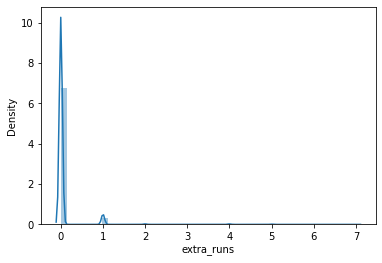

In [28]:
sns.distplot(delivery_df["extra_runs"])

####  almost most of the matches has no extra runs .

In [29]:
delivery_df['player_dismissed']=delivery_df['player_dismissed'].fillna('0')
delivery_df['player_dismissed']=delivery_df['player_dismissed'].apply(lambda x:x if x=='0' else '1')
delivery_df['player_dismissed']=delivery_df['player_dismissed'].astype('int')
wickets=delivery_df.groupby('match_id').cumsum()['player_dismissed'].values
delivery_df['wickets']= 10 - wickets

In [30]:
delivery_df.head()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,1,0,NaN,NaN,1,206,119,10
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,118,10
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,0,0,NaN,NaN,1,206,117,10
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,2,0,NaN,NaN,3,204,116,10
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,4,0,NaN,NaN,7,200,115,10


In [31]:
delivery_df.tail()

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,batsman_runs,extra_runs,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,1,0,NaN,NaN,152,0,4,5
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,2,0,NaN,NaN,154,-2,3,5
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,0,1,1,run out,KH Pandya,155,-3,2,4
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,2,0,NaN,NaN,157,-5,1,4
149577,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,6,SN Thakur,...,0,0,0,1,lbw,NaN,157,-5,0,3


<AxesSubplot:>

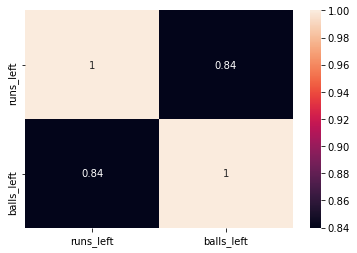

In [32]:
columns=delivery_df[["runs_left","balls_left"]]
CORR=columns.corr()
sns.heatmap(CORR,xticklabels=CORR.columns,yticklabels=CORR.columns,annot=True)

In [33]:
#crr=runs/overs
delivery_df['crr']=(delivery_df['current_score']*6)/(120-delivery_df['balls_left'])

In [34]:
delivery_df['rrr']=(delivery_df['runs_left']*6)/delivery_df['balls_left']

In [35]:
delivery_df

,match_id,city,winner,total_runs_x,inning,batting_team,bowling_team,over,ball,batsman,...,total_runs_y,player_dismissed,dismissal_kind,fielder,current_score,runs_left,balls_left,wickets,crr,rrr
125,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,1,CH Gayle,...,1,0,NaN,NaN,1,206,119,10,6.000000,10.386555
126,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,2,Mandeep Singh,...,0,0,NaN,NaN,1,206,118,10,3.000000,10.474576
127,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,3,Mandeep Singh,...,0,0,NaN,NaN,1,206,117,10,2.000000,10.564103
128,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,4,Mandeep Singh,...,2,0,NaN,NaN,3,204,116,10,4.500000,10.551724
129,1,Hyderabad,Sunrisers Hyderabad,207,2,Royal Challengers Bangalore,Sunrisers Hyderabad,1,5,Mandeep Singh,...,4,0,NaN,NaN,7,200,115,10,8.400000,10.434783
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
149573,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,2,RA Jadeja,...,1,0,NaN,NaN,152,0,4,5,7.862069,0.000000
149574,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,3,SR Watson,...,2,0,NaN,NaN,154,-2,3,5,7.897436,-4.000000
149575,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,4,SR Watson,...,1,1,run out,KH Pandya,155,-3,2,4,7.881356,-9.000000
149576,11415,Hyderabad,Mumbai Indians,152,2,Chennai Super Kings,Mumbai Indians,20,5,SN Thakur,...,2,0,NaN,NaN,157,-5,1,4,7.915966,-30.000000


In [36]:
def result(row):
    return 1 if row['batting_team']==row['winner'] else 0

In [37]:
delivery_df['result']=delivery_df.apply(result,axis=1)

In [38]:
final_df=delivery_df[['batting_team','bowling_team','city','runs_left','balls_left','wickets','total_runs_x','crr','rrr','result']]

In [49]:
final_df

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
125,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,119,10,207,6.000000,10.386555,0
126,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,118,10,207,3.000000,10.474576,0
127,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,206,117,10,207,2.000000,10.564103,0
128,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,204,116,10,207,4.500000,10.551724,0
129,Royal Challengers Bangalore,Sunrisers Hyderabad,Hyderabad,200,115,10,207,8.400000,10.434783,0
...,...,...,...,...,...,...,...,...,...,...
149573,Chennai Super Kings,Mumbai Indians,Hyderabad,0,4,5,152,7.862069,0.000000,0
149574,Chennai Super Kings,Mumbai Indians,Hyderabad,-2,3,5,152,7.897436,-4.000000,0
149575,Chennai Super Kings,Mumbai Indians,Hyderabad,-3,2,4,152,7.881356,-9.000000,0
149576,Chennai Super Kings,Mumbai Indians,Hyderabad,-5,1,4,152,7.915966,-30.000000,0


In [50]:
final_df.sample(final_df.shape[0])

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr,result
115859,Kolkata Knight Riders,Kings XI Punjab,Chandigarh,83,89,10,138,10.645161,5.595506,1
73454,Sunrisers Hyderabad,Royal Challengers Bangalore,Hyderabad,64,51,7,130,5.739130,7.529412,1
81869,Rajasthan Royals,Delhi Daredevils,Jaipur,28,30,9,154,8.400000,5.600000,1
43502,Deccan Chargers,Chennai Super Kings,Nagpur,63,46,7,138,6.081081,8.217391,1
28129,Royal Challengers Bangalore,Mumbai Indians,Port Elizabeth,103,66,7,157,6.000000,9.363636,0
...,...,...,...,...,...,...,...,...,...,...
78273,Chennai Super Kings,Sunrisers Hyderabad,Chennai,90,71,9,159,8.448980,7.605634,1
109181,Royal Challengers Bangalore,Chennai Super Kings,Chennai,84,67,7,148,7.245283,7.522388,0
137614,Delhi Capitals,Kolkata Knight Riders,Delhi,118,67,9,193,8.490566,10.567164,1
116819,Kings XI Punjab,Mumbai Indians,Chandigarh,146,81,8,189,6.615385,10.814815,0


In [51]:
W=final_df[["result"]].value_counts()
W

result
1         38062
0         34351
dtype: int64

#### from the above result we can conclude that our dataset is well-balanced with respect to difference between  number of 1's and 0's .  So it's meaningful to check accuracy score . 

<AxesSubplot:>

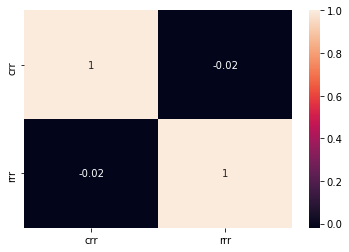

In [52]:
columns=final_df[["crr","rrr"]]
CORR=columns.corr()
sns.heatmap(CORR,xticklabels=CORR.columns,yticklabels=CORR.columns,annot=True)

### from above heatmap (correlation-matrix) it implies that crr & rrr are negatively correlated which is obvious that if crr increases then rrr will decrease . 

In [89]:
import scipy 
print("Karl Pearson correlation coefficient between crr and rrr with p-value are ",scipy.stats.pearsonr(final_df["crr"],final_df["rrr"]))

Karl Pearson correlation coefficient between crr and rrr with p-value are  (-0.020688149859459614, 3.270854134931768e-08)


In [88]:
print("Spearmann correlation coefficient of crr & rrr is",scipy.stats.spearmanr(final_df["crr"],final_df["rrr"]))

Spearmann correlation coefficient of crr & rrr is SpearmanrResult(correlation=-0.08208315358593764, pvalue=6.794512299005453e-107)


In [55]:
final_df.dropna(inplace=True)

<ipython-input-55-3665e38311c9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df.dropna(inplace=True)


In [56]:
final_df=final_df[final_df['balls_left']!=0]

In [57]:
X=final_df.iloc[:,:-1]
y=final_df.iloc[:,-1]
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [58]:
X_train

,batting_team,bowling_team,city,runs_left,balls_left,wickets,total_runs_x,crr,rrr
22755,Rajasthan Royals,Kings XI Punjab,Cape Town,131,110,9,139,4.800000,7.145455
149502,Chennai Super Kings,Mumbai Indians,Hyderabad,91,73,9,152,7.787234,7.479452
4619,Mumbai Indians,Royal Challengers Bangalore,Mumbai,92,66,8,162,7.777778,8.363636
90058,Kolkata Knight Riders,Kings XI Punjab,Abu Dhabi,93,65,7,132,4.254545,8.584615
135658,Kolkata Knight Riders,Sunrisers Hyderabad,Kolkata,101,48,8,189,7.333333,12.625000
...,...,...,...,...,...,...,...,...,...
103573,Rajasthan Royals,Sunrisers Hyderabad,Visakhapatnam,116,108,10,127,5.500000,6.444444
43015,Deccan Chargers,Royal Challengers Bangalore,Bangalore,89,50,7,184,8.142857,10.680000
44720,Delhi Daredevils,Mumbai Indians,Mumbai,86,43,4,183,7.558442,12.000000
105544,Royal Challengers Bangalore,Chennai Super Kings,Bangalore,145,89,8,181,6.967742,9.775281


In [59]:
X_train.describe()

,runs_left,balls_left,wickets,total_runs_x,crr,rrr
count,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000,57073.000000
mean,92.701768,62.944107,7.560738,165.726491,7.449697,10.376401
std,49.979084,33.254165,2.122772,29.295419,2.279581,14.227487
min,-16.000000,-2.000000,0.000000,65.000000,0.000000,-510.000000
25%,53.000000,35.000000,6.000000,147.000000,6.272727,7.146067
50%,92.000000,64.000000,8.000000,165.000000,7.485714,8.880000
75%,130.000000,92.000000,9.000000,185.000000,8.700000,10.875000
max,249.000000,119.000000,10.000000,250.000000,42.000000,678.000000


In [60]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
trf=ColumnTransformer([('trf',OneHotEncoder(sparse=False,drop='first'),['batting_team','bowling_team','city'])
                      ],remainder='passthrough')

In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier
pipe=Pipeline(steps=[('step1',trf),('step2',LogisticRegression(solver='liblinear'))
                    ])

In [62]:
pipe.fit(X_train,y_train)

Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', LogisticRegression(solver='liblinear'))])

In [63]:
#final_df.isnull().sum()  #832 cities have missing values

In [64]:
y_pred=pipe.predict(X_test)
y_pred

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [65]:
pipe.predict_proba(X_test)[10] 

array([0.54363122, 0.45636878])

In [66]:
from sklearn.metrics import accuracy_score
print("Accuracy score using logistic regression = ",accuracy_score(y_test,y_pred))

Accuracy score using logistic regression =  0.8065736912187259


In [67]:
from sklearn.metrics import confusion_matrix 
M=confusion_matrix(y_test,y_pred)
M

array([[5365, 1446],
       [1314, 6144]], dtype=int64)

In [68]:
ACCU=(5365+6144)/(5365+1446+1314+6144)
print("acuuracy of this binary classification model getting from confusion matrix ",ACCU)

acuuracy of this binary classification model getting from confusion matrix  0.8065736912187259


In [69]:
Pipe=Pipeline(steps=[('step1',trf),('step2',RandomForestClassifier())])

In [70]:
Pipe.fit(X_train,y_train)


Pipeline(steps=[('step1',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('trf',
                                                  OneHotEncoder(drop='first',
                                                                sparse=False),
                                                  ['batting_team',
                                                   'bowling_team', 'city'])])),
                ('step2', RandomForestClassifier())])

In [71]:
y_pred=Pipe.predict(X_test)
y_pred

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [72]:
Pipe.predict_proba(X_test)[10]

array([0.05, 0.95])

In [73]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.9963482281966306


In [74]:
from sklearn.metrics import confusion_matrix 
M=confusion_matrix(y_test,y_pred)
M

array([[6809,    2],
       [  11, 7447]], dtype=int64)

In [75]:
print("Accuracy of random-forest is",(6807+7452)/(6807+7452+10))

Accuracy of random-forest is 0.9992991800406475


#### RECALL means out of total actual positive values number of values the model predicts correctly 
#### PRECISION means out of total positive predicted values number of values that are actual positive  

#### here from M we can see type-1-error (FP = 4) and type-2-error (FN= 6) are so small  w.r.t recall and precision 

In [76]:
RECALL = 7452/(6+7452) 
precision= 7452/7456
FPR=4/6811

In [77]:
print("here sensitivity score /RECALL/true-positive-rate is",RECALL)

here sensitivity score /RECALL/true-positive-rate is 0.999195494770716


In [78]:
print("So positive prediction value/ precision is",precision)

So positive prediction value/ precision is 0.9994635193133047


In [79]:
print("False-positive-rate = ",FPR)

False-positive-rate =  0.0005872852738217589


In [ ]:
from sklearn.metrics import classification_report
A=classification_report(y_test,y_pred)
A

In [ ]:
scorelist=[]
for i in range(10,100):
    Pipe=Pipeline(steps=[('step1',trf),('step2',RandomForestClassifier(i))])
    Pipe.fit(X_train,y_train)
    y_pred=Pipe.predict(X_test)
    scorelist.append(Pipe.score(X_test,y_test)*100)
plt.plot(range(10,100),scorelist)
plt.title("Accuracy vs n-estimators")
plt.xlabel("Number of Estimators(desicion trees)")
plt.ylabel(" SCORE")
plt.show()

### from above plotting we can conclude changing number of estimators accuracy is quite fluctuating . 

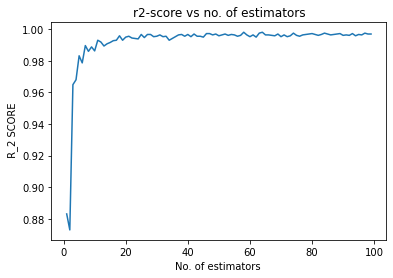

In [81]:
scorelist=[]
for i in range(1,100):
    pipe1=Pipeline(steps=[('step1',trf),('step2',RandomForestClassifier(i))])
    pipe1.fit(X_train,y_train)
    y_pred=pipe1.predict(X_test)
    scorelist.append(r2_score(y_test,y_pred))
plt.plot(range(1,100),scorelist)
plt.title("r2-score vs no. of estimators")
plt.xlabel("No. of estimators ")
plt.ylabel(" R_2 SCORE")
plt.show()

####  Here it is seen clearly that if we increase number of estimators R2 score getting better ..almost tends to 1 means "almost perfect fit " 

In [82]:
from sklearn.tree import DecisionTreeClassifier
pipe2=Pipeline(steps=[('step1',trf),('step2',DecisionTreeClassifier())])
pipe2.fit(X_train,y_train)
y_pred=pipe2.predict(X_test)
y_pred


array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [83]:
pipe2.predict_proba(X_test)[10]

array([0., 1.])

In [84]:
print("Accuracy score using decision tree = ",accuracy_score(y_test,y_pred))

Accuracy score using decision tree =  0.9906090125446773


In [85]:
score=r2_score(y_test,y_pred)
score 

0.962358659872962

In [86]:
columns=final_df[["runs_left","balls_left","crr","rrr","result"]]
columns

,runs_left,balls_left,crr,rrr,result
125,206,119,6.000000,10.386555,0
126,206,118,3.000000,10.474576,0
127,206,117,2.000000,10.564103,0
128,204,116,4.500000,10.551724,0
129,200,115,8.400000,10.434783,0
...,...,...,...,...,...
149572,1,5,7.878261,1.200000,0
149573,0,4,7.862069,0.000000,0
149574,-2,3,7.897436,-4.000000,0
149575,-3,2,7.881356,-9.000000,0


In [87]:
y=columns.drop["result"]
y

TypeError: 'method' object is not subscriptable